# Assignment 4

## Objective of this assignment
The objective of this exercise is to understand how the unsupervised learning methods $k$-means clustering and hierarchical clustering work. Upon completing the exercise you should also understand how the choice of number of clusters, distance metrics and linkage functions can impact the solutions obtained and further be able to interpret dendrograms and measures of cluster validity

## ** Important: ** When handing in your homework:
+ Hand in the notebook **(and nothing else)** named as follows: **StudentName1_snumber_StudentName2_snumber.ipynb**
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Brightspace.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ Use the Brightspace discussion board or email the student assistants for questions on how to complete the exercises.
+ If you find mistakes/have suggestions/would like to complain about the assigment material itself, please email me [Lisa] at `l.tostrams@science.ru.nl`


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 8.1-8.3 and 8.5.7


## Additional Tools
For this exercise you will need to load the provided *clusterPlot.py* and *clusterVal.py* scripts. 


## Introduction
In previous exercises we considered supervised learning, i.e., we were given both input data **X** and output values **Y**. We now move on to unsupervised learning where we are only provided input data **X**. The aim is here to find common patterns in the data such as groups of observations that are similar in some sense. In this exercise we will consider two clustering approaches for unsupervised learning: *k*-means clustering and hierarchical clustering.


## 4.1 *k*-means clustering
In this part of the exercise we will investigate *k*-means clustering. In *k*-means each of the data points are assigned to the cluster in closest proximity according to some measure of distance between cluster centers and data points. When the distance is given by the squared euclidian distance, the centers are also called centroids. Once the data points have been assigned, each cluster center is updated to be placed at the center of the data points that are assigned to the cluster. This continues iteratively, usually until the assignment of data points to centers no longer changes or until a maximal number of iterations is reached.

> 4.1.1a (1 point) Load the `synth1` data into python using the `loadmat` function. Cluster the data into *K = 4* clusters using the *k*-means algorithm. Make a scatter plot of the data and the clustering using the provided `clusterPlot()` function. **Don't forget to add axis labels and titles.**
 + *In Python, you can use the function `KMeans()` from the package `sklearn.cluster` to compute *k*-means clustering. please read the documentation of the function, as it creates an object which you can then use for clustering.*
 + *Type `clusterPlot(X,clusters,centroids,y)` to plot the data and the clustering. Don't forget to import the function from the Toolbox folder. If you are unsure about how to use the function, open the .py file in a text editor and take a look at documentation.*


_Let's inspect our data first._

In [156]:
##Answer to question 4.1.1a
%matplotlib inline

from scipy.io import loadmat
import pandas as pd

synth_names = [f'Data/synth{i}' for i in range(1, 5)]
synths = [loadmat(synth_name) for synth_name in synth_names]
pd.DataFrame(synths[0]['X']).head()

,0,1
0,0.418193,0.725060
1,1.160776,1.253722
2,0.991951,0.573326
3,1.059111,1.143922
4,0.866616,1.143537


Text(0.5, 1.0, 'Unlabelled data')

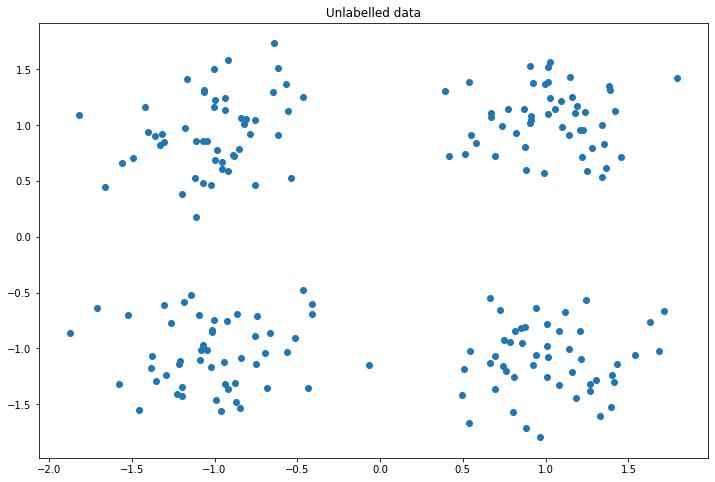

In [157]:
data = synths[0]['X']
plt.rcParams['figure.figsize'] = [12, 8] 
plt.scatter(data[:,0],data[:,1])
plt.title('Unlabelled data')

In [205]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8] # enlarge the default figure to make it more legible
from Toolbox.clusterPlot import clusterPlot

def kmeans(k, data):
    estimator = KMeans(k)
    estimator.fit(data)
    return estimator.labels_, estimator.cluster_centers_

def kmeans_plot(k, data, data_name):
    labels, cluster_centers = kmeans(k, data['X'])
    plt.title(f'{k}-means clustering: {data_name}')
    clusterPlot(data['X'], labels, cluster_centers, data['y'])
    plt.show()

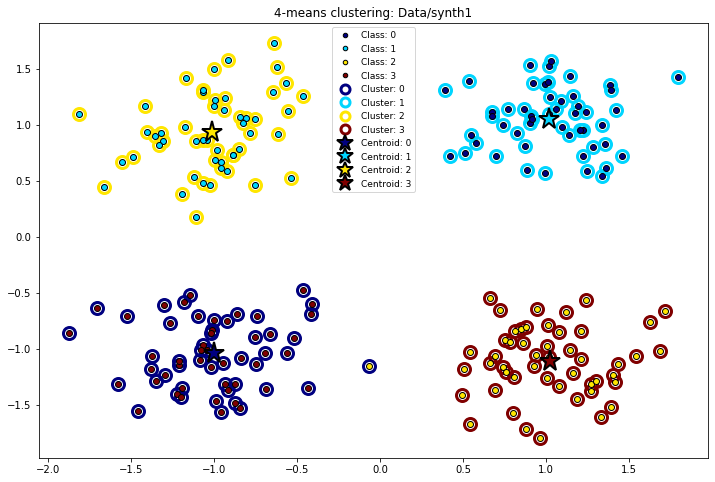

In [159]:
kmeans_plot(4, synths[0], synth_names[0])

_Axis labels don't really make sense here, as this is a synthetic datatset._

> 4.1.1b (1 point) Try also to cluster and plot the data sets *synth2*, *synth3*, and *synth4* with the same number of *K*. Does the clustering coincide with the true classes? Explain for every data set (including the first one). 

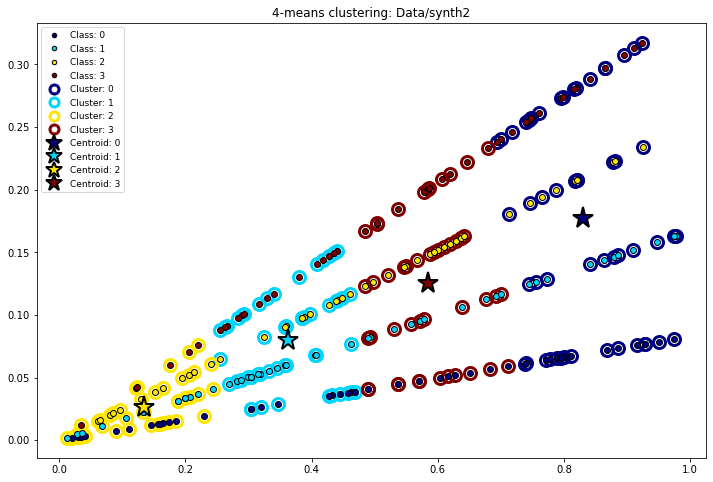

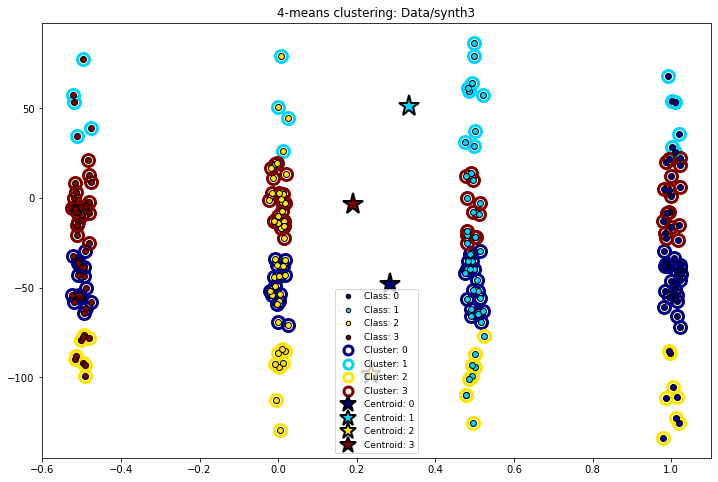

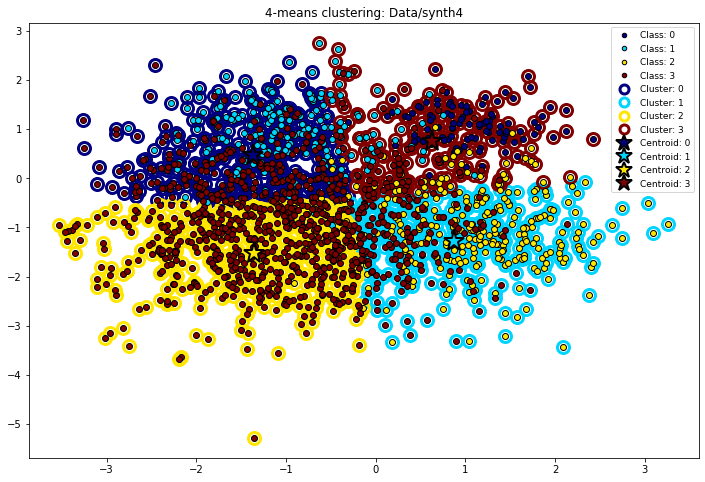

In [160]:
for synth, synth_name in zip(synths[1:], synth_names[1:]):
    kmeans_plot(4, synth, synth_name)

----

_Synth1 is very "neat": the clusters are well-separated globules, so -as could be expected - k-means performs very well. The other ones aren't: synth2 has clusters which are a bit more conceptual, slightly overlapping, and definitely not globular (maybe some nearest-neighbor-based clustering would do a good job here?), synth3 is a bit better, but the clusters are still confusingly elongated, and synth4's clusters - while globular - overlap a lot._ Overall, only for Synth1 clustering coincides with the true classes except for the data point in (0.0, -1.0), which is clustered incorrectly. The labels are assigned different but they remained in the same cluster. 

----

Rather than using the error rate we will consider the supervised measures of cluster validity described in *Introduction to Data Mining* section 8.5.7, in particular the entropy, purity, rand statistic, and Jaccard coefficient. Carefully review these measures in the book and make sure you understand how they are calculated.

> 4.1.2a (1 point) Repeat Exercise 4.1.1, but this time perform *k*-means clustering for *K = 1, ..., 10* clusters. For each value of *K* compute the four cluster validity measures mentioned above. Plot the cluster validity measures as a function of *K*
 + *Use the `clusterVal()` function to compute the cluster validity. Don't forget to import it from the Toolbox folder. If you are unsure about how to use the function, open the .py file in a text editor and take a look at documentation.*

In [161]:
from Toolbox.clusterVal import clusterVal
import numpy as np

def analyze_validity(data, data_name, ks=range(1, 11)):
    measures = [] # entropy, purity, rand, jaccard
    for k in ks:
        labels, _ = kmeans(k, data['X'])
        measures.append(clusterVal(data['y'], labels))
    entropy, purity, rand, jaccard = np.array(measures).T
    plt.title(f'measures for {data_name}')
    plt.xlabel('number of clusters')
    plt.plot(np.array(ks), entropy, label='entropy')
    plt.plot(np.array(ks), purity, label='purity')
    plt.plot(np.array(ks), rand, label='rand')
    plt.plot(np.array(ks), jaccard, label='jaccard')
    plt.legend()
    plt.show()

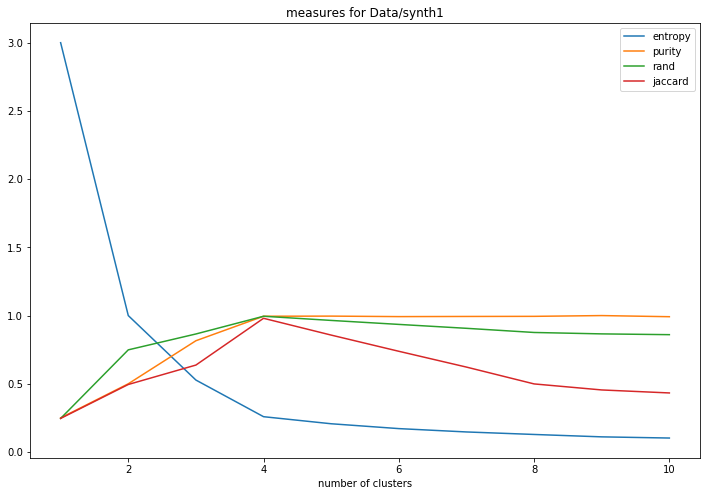

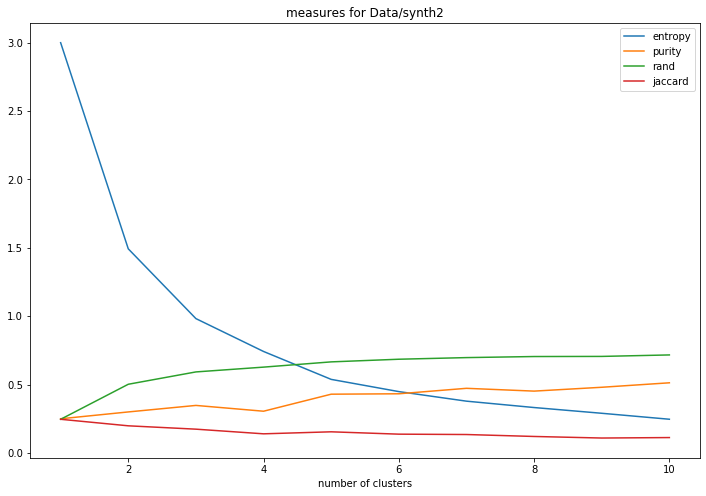

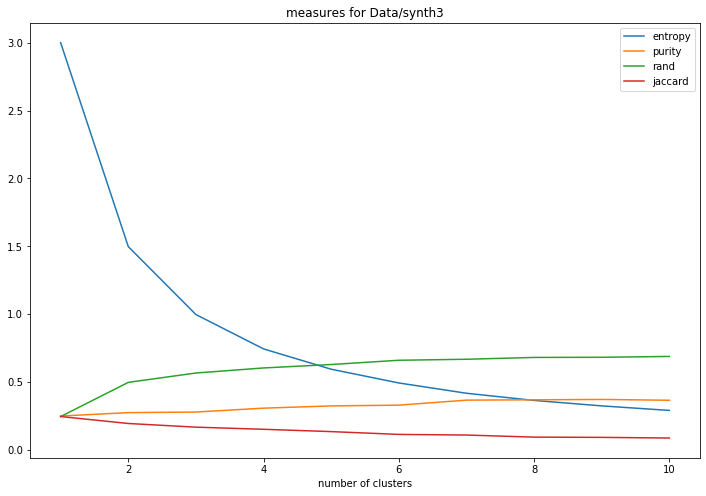

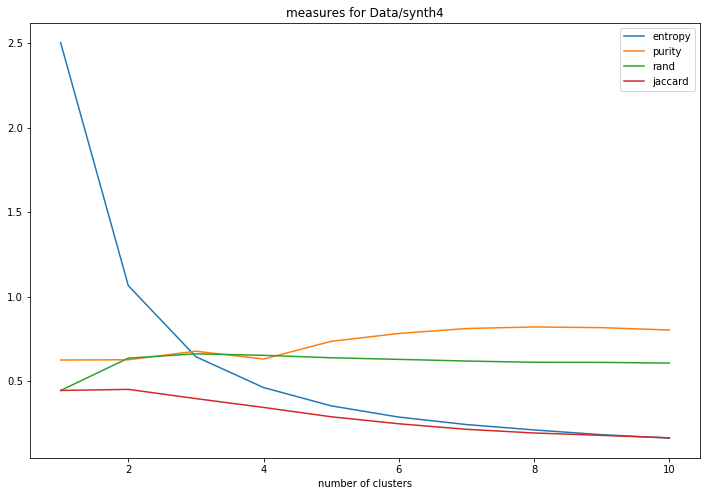

In [162]:
for synth, synth_name in zip(synths, synth_names):
    analyze_validity(synth, synth_name)

> 4.1.2b (1 point) How can the cluster validity measures be used to select the best number of clusters?
What happens when more than four clusters are used to model the data?

**Answer**

----

_The metrics have different optimal values: entropy lowers with improved performance, the others grow. We can use them to tell what number of clusters is best, but we have to keep in mind that too many clusters simply indicate an overfitted model.
What happens with more clusters than classes differs per dataset: when k-means does well, adding more clusters doesn't do much (except for lowering the Jaccard coefficient and Rand index, because now some pairs of points which are in one class must end up in separate clusters). When k-menas doesn't do well, more clusters may still help - especially when the data is locally separated, but stretched out (synth2 and synth3). With synth4, more clusters don't really help - the problem here is not about modeling complex cluster shapes with more globules, it's about separating data points based on information we don't have (some additional information would be needed to distinguish a point from class 1 from a point from class 2 with high certainty). The problem posed by synth4, really, is hopeless - not just to a computer, but to a human as well._

----

*k*-means clustering has many different applications, one of which is data compression. A data set can be compressed by performing *k*-means clustering and then representing each data object by its cluster center. Thus, the only data that need to be stored are the *K* cluster centers and the *N* cluster indices.

> 4.1.3a (1 point) We will consider a subset of the wild faces data described in berg2005[1]. Load the wildfaces data, *Data/wildfaces* using the *loadmat* function. Each data object is a $40 \times 40 \times 3 = 4800$ dimensional vector, corresponding to a 3-color $40 \times 40$ pixels image. Compute a *k*-means clustering of the data with *K = 10* clusters. Plot a few (>3) random images from the data set as well as their corresponding cluster centroids to see how they are represented.
+ You can plot the `k`'th image from array `X` by the command `imshow(np.reshape(X[k,:],(3,40,40)).T)`, which reshapes an image vector to a 3-dimensional array and plots it. You can plot the cluster centroids in a similar manner.


In [163]:
from scipy.io import loadmat

faces = loadmat('Data/wildfaces')['X']
faces.shape

(1000, 4800)

In [49]:
import matplotlib.pyplot as plt
import numpy as np

def plot_face(face_vector, plot_on=plt):
    plot_on.imshow(np.reshape(face_vector, (3, 40, 40)).T)
    plot_on.set_xticks([])
    plot_on.set_yticks([])

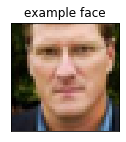

In [50]:
fig = plt.figure(figsize=(2, 2))
plot_face(faces[0], fig.add_subplot(1, 1, 1))
plt.title('example face')
plt.show()

In [10]:
from sklearn.cluster import KMeans

def compare_faces(original, compressed, plot_on=plt):
    fig = plt.figure(figsize=(4, 2))
    for subplot_id, (face, title) in enumerate(zip([original, compressed], ['original', 'compressed'])):
        subplot = fig.add_subplot(1, 2, subplot_id + 1)
        subplot.set_title(title)
        plot_face(face, subplot)

def demo_compression(num_clusters, data, indices):
    print(f'Compression with {num_clusters} clusters') # plt.title made things very ugly
    labels, centroids = kmeans(num_clusters, data)
    for face, centroid in zip(data[indices], centroids[labels[indices]]):
        compare_faces(face, centroid, plt)
    plt.show()

Compression with 10 clusters


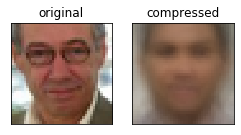

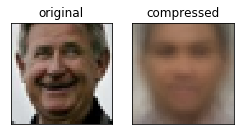

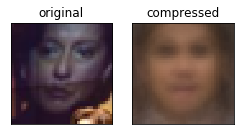

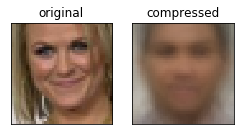

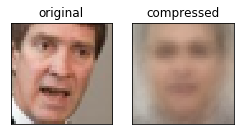

In [112]:
demo_indices = np.random.randint(len(faces), size=5) # used later so that comparison is done with the same faces
demo_compression(10, faces, demo_indices)

> 4.1.3b (1 point) How well is the data represented by the cluster centroids? Are you able to recognize the faces in the compressed representation? What happens if you increase or decrease the number of clusters?

Compression with 5 clusters


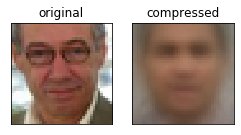

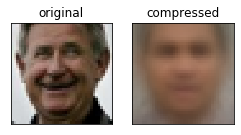

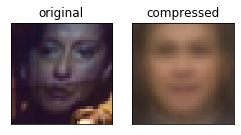

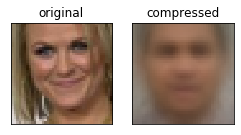

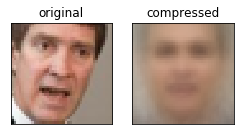

In [113]:
demo_compression(5, faces, demo_indices)

Compression with 32 clusters


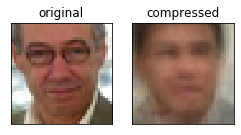

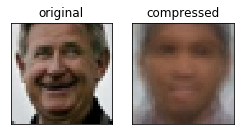

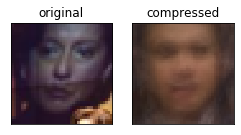

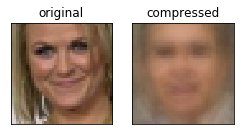

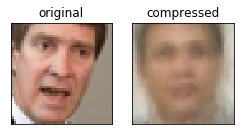

In [114]:
demo_compression(32, faces, demo_indices)

**Answer**

-----

_The more clusters, the more the cluster centers resemble actual faces. Averaging images really isn't a good way of blending between them, and this can be seen clearly here - because the faces have different orientations, the mean of many face images is extremely blurry, with no characteristic features except for general size, skin, and background color. What's more, brightness and colors matter here much more than facial features due to the usage of Euclidean distance in color space, rather than a more sophisticated measure such as eg. SSIM - we can see that the 5-cluster model is really deciding whether the face is light or dark, and on a light or dark background._

-----

> 4.1.4a (1 point) Repeat the exercise with the digits data set. Load the digits data set from Data/digits. Each data object is a $16 \times 16 = 256$ dimensional vector, corresponding to a gray scale $16 \times 16$ pixels image.
+ You can change the color map to black-on-white gray-scale by adding the parameter `cmap=cm.binary` to the function `imshow()`.

In [185]:
from scipy.io import loadmat

digits = loadmat('Data/digits')
print(digits['X'].shape)

# Just for visualization
import pandas as pd
pd.DataFrame(digits['X']).head()

(9298, 256)


,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,-0.167,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.996,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,0.234,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0


In [165]:
# Check distributions of labels
unique, counts = np.unique(digits['y'], return_counts=True)
dict(zip(unique, counts))

{0: 1553,
 1: 1269,
 2: 929,
 3: 824,
 4: 852,
 5: 716,
 6: 834,
 7: 792,
 8: 708,
 9: 821}

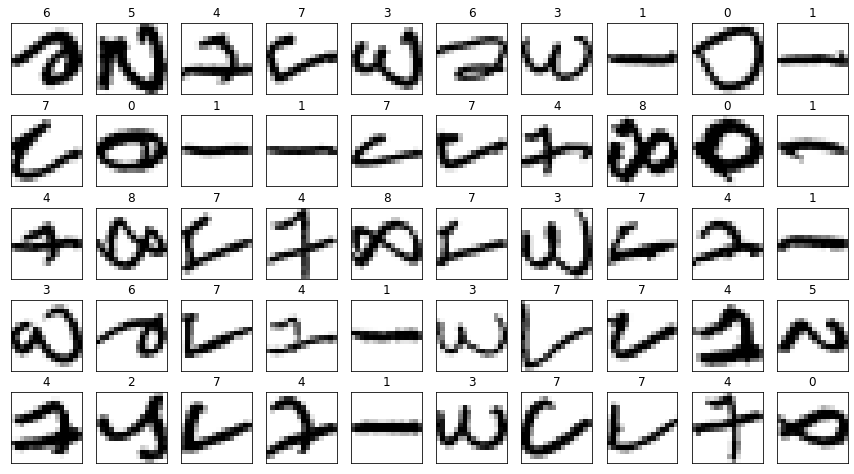

In [217]:
import matplotlib.pyplot as plt
import numpy as np

def plot_digit(digit_vector, plot_on=plt, label=''):
    plt.title(f'{label}')
    plot_on.imshow(np.reshape(digit_vector, (16,16)).T, cmap=plt.cm.binary)
    plot_on.set_xticks([])
    plot_on.set_yticks([])
    
fig = plt.figure(figsize=(15, 15))

for i in range(50):
    plot_digit(digits['X'][i], plt.subplot(9,10,i + 1), digits['y'].tolist()[i][0])
plt.show()

> 4.1.4b (1 point) Why does running *k*-means with *K = 10* not give you 10 clusters corresponding to the 10 digits *0..9*? How many clusters do you need to visually represent the 10 different digits? Are there any digits that the clustering algorithm seems to confuse more than others and can you explain why?

Text(0.5, 1.0, 'Unlabbeled data using the first two variables')

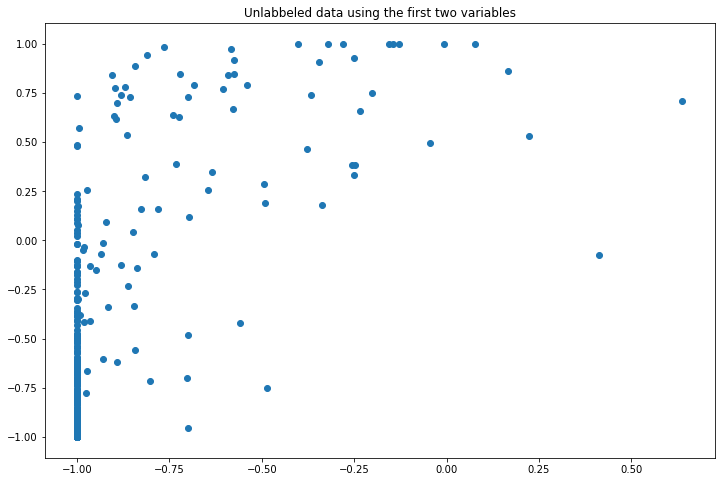

In [167]:
plt.scatter(digits['X'][:,0],digits['X'][:,1])
plt.title('Unlabbeled data using the first two variables')

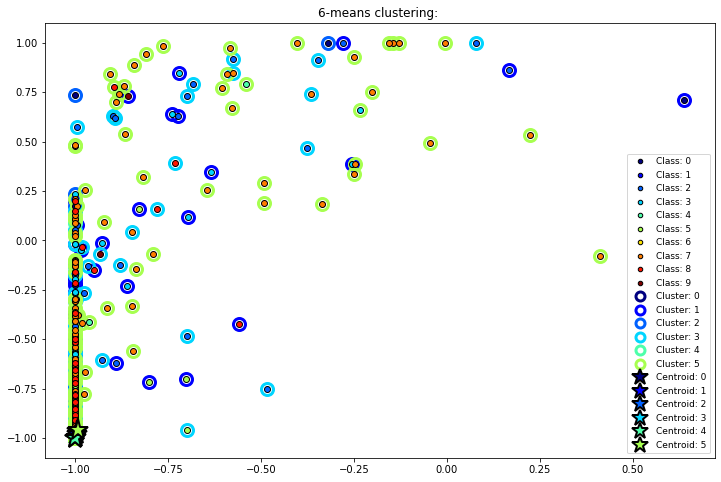

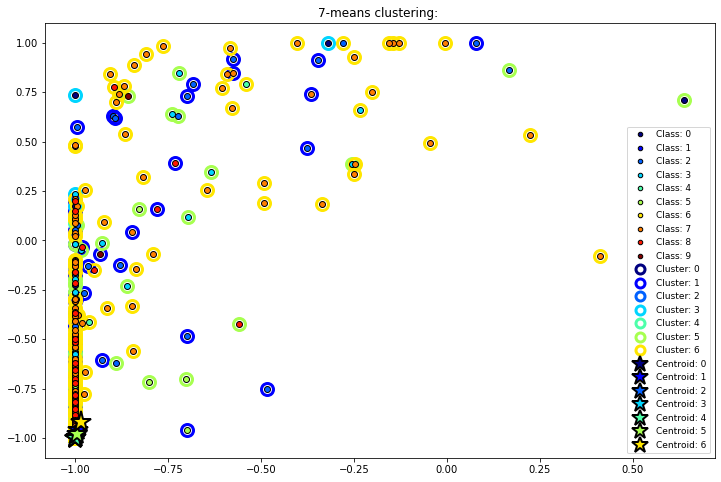

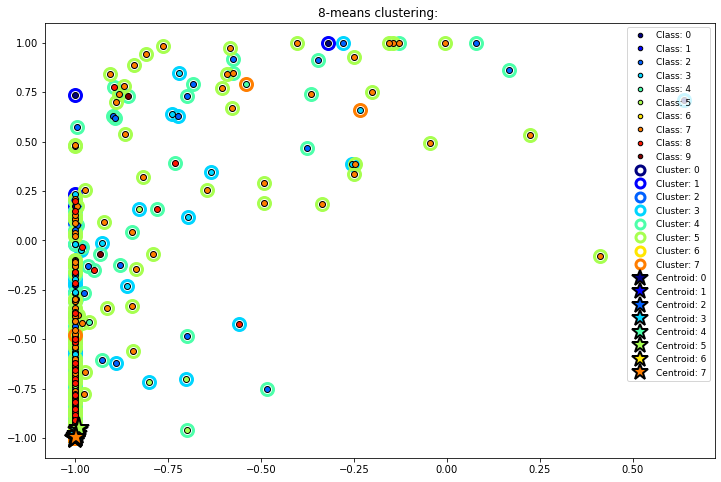

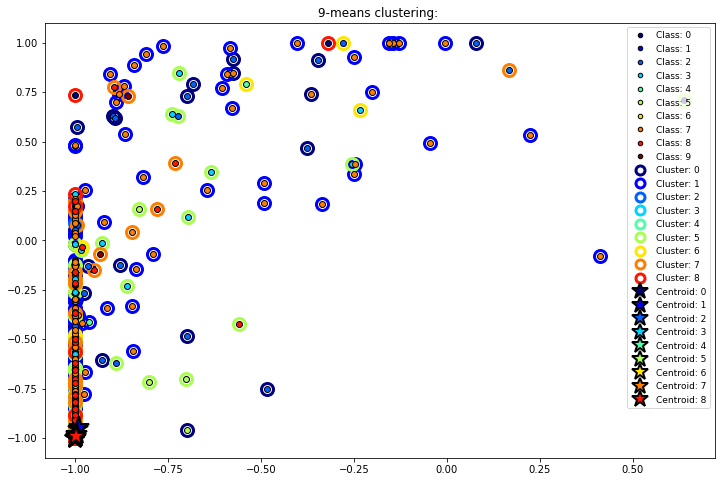

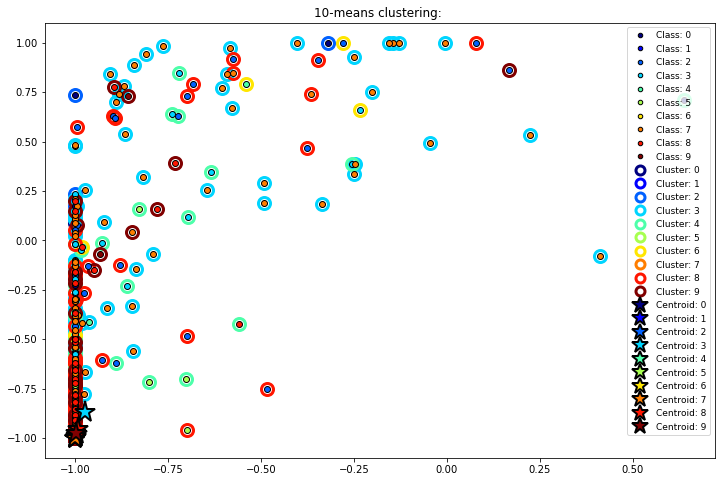

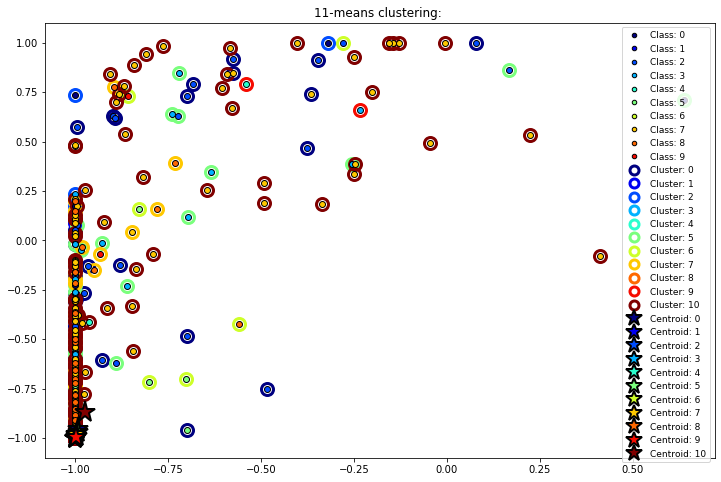

In [168]:
for i in range(6,12):
    kmeans_plot(i, digits, '')

***Working with 256 dimensional samples deals to the curse of dimensionality, and for this reason is difficult to cluster the data points. To avoid this, first we need to apply a dimensional reduction method. Next we apply PCA to extract eigen values from the 256 variables, to later do clustering.***

Digits with shape: (9298, 256) was reduced to (9298, 2)


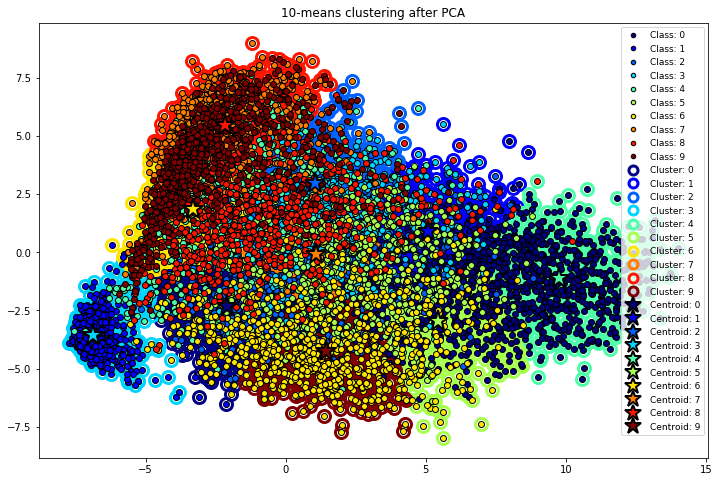

In [216]:
from sklearn.preprocessing import StandardScaler

def pca(data, n):
    pca_std  = StandardScaler().fit_transform(data)
    pca = PCA(n_components=n)
    data_reduced = pca.fit(data).transform(data)
    return data_reduced

def kmeans_pca_plot(k, data, true_labels):
    labels, cluster_centers = kmeans(k, data)
    plt.title(f'{k}-means clustering after PCA')
    clusterPlot(data, labels, cluster_centers, true_labels)
    plt.show()
    
# PCA for the 2 main components
n = 2
reduced_data = pca(digits['X'], n)

dim = digits['X'].shape
print(f'Digits with shape: {dim} was reduced to {reduced_data.shape}')    
kmeans_pca_plot(10, reduced_data, digits['y'])

**Answer**

---

Working with 256 dimensional samples deals to the curse of dimensionality, and for this reason is difficult to cluster the data points since euclidean distances tend to become inflated in very high-dimensional spaces. Eventhough after applying PCA, the clusters still not clearly identifiable, we argue that this is because the input data has a lot of noise that makes it difficult to discriminate each class from another (not clear shapes, images rotated or flipped), i.e, number 2 and 5 could look very similar, 7 with 4. 

---



## 4.2 Hierarchical Clustering

In this part of the exercie we will consider hierarchical clustering based on the functions from the package `scipy.cluster.hierarchy`. The function `linkage()` forms a sample to sample distance matrix according to a given distance metric, and creates the linkages between data points forming the hierarchical cluster tree. The function `dendrogram()` creates a plot of the generated tree. The function `fcluster()` extracts the cluster from a linkage matrix w.r.t. a given criterion. Read the online documentation and inspect what distance metrics and linkage functions are implemented.

> 4.2.1a (1 point) Load the data set from *Data/synth1*. Cluster the data using hierarchical clustering with single linkage using the Euclidean distance measure. Cluster the data into 4 clusters by cutting off the dendrogram at the right threshold. Plot a dendrogram and a scatter plot of the clusters.
+ The function `linkage()` computes the hierarchical clustering, resulting in a matrix representing the hierarchy of clusterings. Read the online documentation to learn how to use it.
+ You can e.g. type `Z = linkage(X, method='single', metric='euclidean')` to use single linkage with the Euclidean distance measure.
+ To compute a clustering, you can use the function `fcluster()`. For example, type `cls = fcluster(Z, criterion='maxclust', t=4)` to get a maximum of 4 clusters. 
+ To plot a dendrogram, you can use the *dendrogram()* function
+ Again, you can use the function *clusterplot()* to plot a scatter plot of the clustering.

In [ ]:
from sklearn.cluster import hierarchy


> 4.2.1b (1 point) Change the linkage methods (single, complete, average) and explain how this changes the dendrogram.
Then plot a dendrogram and a scatterplot of the clusters for the *synth2*, *synth3*, and *synth4* data sets..

**Answer**

----


----

## References
1. Tamara L Berg, Alexander C Berg, Jaety Edwards, and DA Forsyth. Who's in the
picture. *Advances in Neural Information Processing Systems*, 17:137-144, 2005.